In [6]:
# -*- coding: utf-8 -*-
import json
import cv2
from yolo.frontend import create_yolo
from yolo.backend.utils.box import draw_scaled_boxes
import os
import yolo

In [7]:
DEFAULT_THRESHOLD = 0.4

# 2. create yolo instance
yolo_detector = create_yolo("MobileNet", ["digit"], 288)

The network is initialized random weights
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 288, 288, 3)       0         
_________________________________________________________________
model_3 (Model)              (None, 9, 9, 1024)        3228864   
_________________________________________________________________
detection_layer (Conv2D)     (None, 9, 9, 30)          30750     
_________________________________________________________________
reshape_2 (Reshape)          (None, 9, 9, 5, 6)        0         
Total params: 3,259,614
Trainable params: 3,237,726
Non-trainable params: 21,888
_________________________________________________________________


In [9]:
DEFAULT_WEIGHT_FILE = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "mobile_288_weights.h5")

yolo_detector.load_weights(DEFAULT_WEIGHT_FILE)

Loading pre-trained weights in C:\Users\penny\git\basic-yolo-keras\tests\dataset\svhn\mobile_288_weights.h5


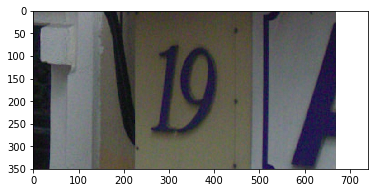

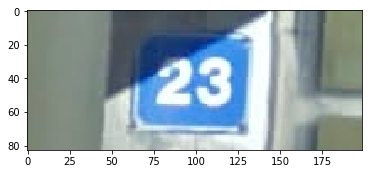

In [21]:
import os
import matplotlib.pyplot as plt
%matplotlib inline  
DEFAULT_IMAGE_FOLDER = os.path.join(yolo.PROJECT_ROOT, "tests", "dataset", "svhn", "imgs")

img_files = [os.path.join(DEFAULT_IMAGE_FOLDER, "1.png"), os.path.join(DEFAULT_IMAGE_FOLDER, "2.png")]
imgs = []
for fname in img_files:
    img = cv2.imread(fname)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    imgs.append(img)
    plt.imshow(img)
    plt.show()

In [ ]:
THRESHOLD = 0.4
for img in imgs:
    boxes, probs = yolo.predict(img, THRESHOLD

    # 4. save detection result
    image = draw_scaled_boxes(image, boxes, probs, model_config['labels'])
    output_path = os.path.join(write_dname, os.path.split(img_fname)[-1])

    cv2.imwrite(output_path, image)
    print("{}-boxes are detected. {} saved.".format(len(boxes), output_path))


In [ ]:
    

    # 3. read image
    write_dname = "detected"
    if not os.path.exists(write_dname): os.makedirs(write_dname)
    
    # 4. 
    files = os.listdir(config['train']['valid_annot_folder'])
    
    for fname in files:
        fname_ =  os.path.splitext(fname)[0]
        img_fname = fname_ + ".png"
        img_path = os.path.join(config['train']['valid_image_folder'], img_fname)
        image = cv2.imread(img_path)
        
        boxes, probs = yolo.predict(image, float(args.threshold))
      
        # 4. save detection result
        image = draw_scaled_boxes(image, boxes, probs, model_config['labels'])
        output_path = os.path.join(write_dname, os.path.split(img_fname)[-1])
        
        cv2.imwrite(output_path, image)
        print("{}-boxes are detected. {} saved.".format(len(boxes), output_path))
